# Kryptografia klasyczna (od starożytności do czasów współczesnych)
### Literatura:
1. Księga szyfrów, Simon Singh, Świat książki, 2001
2. Łamacze kodów, David Kahn, WNT, 2004

## Szyfr Cezara

--------------
Szyfr Cezara oczywiście nie zawdzięcza swego istnienia Juliuszowi Cezarowi. Został przezeń jedynie wspomniany w pamiętnikach o wojnach galijskich. Prawdopodobnie była to dobrze znana metoda w tym czasie.

In [342]:
# Alfabet jawny i szyfrowy 
alphabets = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
            'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

alphabet_size = 26

plaintext = "Zorro fly zealotry zipper"

ciphertext = ""

key = 15 #przesunięcie permutacji czyli klucz szyfrowania 

print("Tekst jawny: ", plaintext)

for text in plaintext.lower().split():
    for char in text:
        ciphertext = ciphertext + alphabets[(alphabets.index(char) + key) % alphabet_size] 
print("Szyfrogram: ",  ciphertext, "(spacje usunięte)")

decodedtext = ""
for text in ciphertext:
    for char in text:
        decodedtext = decodedtext + alphabets[(alphabets.index(char)- key) % alphabet_size]
print("Odszyfrowana wiadomość: ",  decodedtext,  "(spacje usunięte)")

Tekst jawny:  Zorro fly zealotry zipper
Szyfrogram:  odggduanotpadignoxeetg (spacje usunięte)
Odszyfrowana wiadomość:  zorroflyzealotryzipper (spacje usunięte)


## Szyfr monoalfabetyczny: 
_danemu symbolowi alfabetu jawnego odpowiada dokładnie jeden i ten sam symbol alfabetu tajnego._

### Zastanów się:
##### 1. Czy szyfr Cezara jest łatwy do złamania? Ile prób (testów przesunięć) trzeba aby złamać szyfr Cezara?
- Potrzeba o jedną mniej niż liczba liter w alfabecie, przy pomocy którego zapisana została wiadomość. Wynika to stąd, że w szyfrze Cezara każda litera zaszyfrowanej wiadomości jest przesunięta o tyle samo pozycji w alfabecie. Wystarczy więc sprawdzić wszystkie możliwe przesunięcia, a jest ich o 1 mniej niż liczba liter w alfabecie ($k=0$ nie sprawdzamy, bo wtedy wiadomość jest taka sama jak szyfrogram).

##### 2. Co to jest atak siłowy (__brute force__)? 
- Jest to atak, w którym sprawdzane są wszystkie możliwości. W przypadku szyfru Cezara, atak brute force polegałby na sprawdzeniu wszystkich możliwych przesunięć liter alfabetu.

##### 3. Zaproponuj i zaimplementuj wariant szyfru Cezara, która wymaga wykonania większej liczby prób podczas ataku? 
- Szyfr Cezara z zastosowaniem klucza, określającego różne przesunięcie dla kolejnych liter szyfrowanej wiadomości.

lub:

- Szyfr Vinegere'a - wykorzystywana jest tablica kwadratowa, w której każdy wiersz zawiera kolejne litery alfabetu przesunięte o inną liczbę pozycji (w każdym kolejnym wierszu litery są przesunięte o 1 pozycję w lewo względem poprzedniego). Potrzebny jest klucz (tym razem klucz jest tekstem, zbudowanym przy pomocy tego samego alfabetu, co szyfrowana wiadomość) o długości równej długości szyfrowanej wiadomości. Następnie, dla kolejnych par liter, stojących na odpowiednio tych samych pozycjach szyfrowanej wiadomości i klucza, wyznaczana jest litera z tablicy, jako przecięcie kolumny, odpowiadającej literze szyfrowanego tekstu oraz wiersza, otrzymanego dla danej litery z klucza.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Vigen%C3%A8re_square_shading.svg/800px-Vigen%C3%A8re_square_shading.svg.png?1665846425974" width="500px" />

Aby odszyfrować wiadomość, trzeba znaleźć wiersz, który odpowiada danej literze klucza, przy pomocy którego zaszyfrowana została wiadomość. Następnie, w tym wierszu należy znaleźć położenie litery z zaszyfrowanej wiadomości, stojącej na tej samej pozycji, co litera z klucza, odpowiadająca danemu wierszowi. Litera przypisana kolumnie, w której znajduje się znaleziona litera z zaszyfrowanej wiadomości, odpowiada literze z wyjściowej wiadomości (tej, która została zaszyfrowana).

##### 4. Oceń koszt ataku na ten wariant Cezara.
Szyfr Cezara z kluczem określającym różne przesunięcia liter:
- W przypadku pierwszego wariantu, w którym korzystamy tylko z różnego przesunięcia dla kolejnych liter alfabetu, konieczne będzie wykonanie $L^n - 1$ prób, gdzie $L$ - jest długością alfabetu, a $n$ - długością szyfrowanej wiadomości.

Szyfr Vinegere'a:
- Koszt jest taki sam, jak w poprzednim algorytmie, ponieważ konieczne jest sprawdzenie wszystkich możliwych kluczy, a na każdej pozycji klucza może znajdować się jedna z liter alfabetu.

#### Rozwiązania implementacyjne

Szyfr Cezara z $n$-elementowym kluczem

In [343]:
alphabet = "abcdefghijklmnopqrstuvwxyz"

def caesar_init(alphabet):
    positions = { k: i for i, k in enumerate(alphabet) }
    
    def encrypt(text, key):
        result = []
        for i, char in enumerate(text):
            offset = key[i % len(key)]
            if char in positions:
                result.append(alphabet[(positions[char] + offset) % len(alphabet)])
            else:
                result.append(char)
        return ''.join(result)
            
    def decrypt(encrypted_text, key):
        result = []
        for i, char in enumerate(encrypted_text):
            offset = key[i % len(key)]
            if char in positions:
                result.append(alphabet[positions[char] - offset])
            else:
                result.append(char)
        return ''.join(result)
        
    return encrypt, decrypt

encrypt, decrypt = caesar_init(alphabet)

In [344]:
plain_text = 'ala ma kota'
key = [1, 5, 8, 4, 22, 11, 14, 17, 2, 7, 0]

encrypted = encrypt(plain_text, key)
decrypted = decrypt(encrypted, key)

print('Encrypted:', encrypted)
print('Decrypted:', decrypted)
print('Is ok?:', plain_text == decrypted)

Encrypted: bqi il bqaa
Decrypted: ala ma kota
Is ok?: True


Szyfr Vinegere'a

In [345]:
alphabet = "abcdefghijklmnopqrstuvwxyz"

def vinegere_init(alphabet):
    positions = { k: i for i, k in enumerate(alphabet) }
    
    def encrypt(text, key):
        result = []
        for i, char in enumerate(text):
            offset = positions[key[i % len(key)]]
            if char in positions:
                result.append(alphabet[(positions[char] + offset) % len(alphabet)])
            else:
                result.append(char)
        return ''.join(result)
            
    def decrypt(encrypted_text, key):
        result = []
        for i, char in enumerate(encrypted_text):
            offset = positions[key[i % len(key)]]
            if char in positions:
                result.append(alphabet[positions[char] - offset])
            else:
                result.append(char)
        return ''.join(result)
        
    return encrypt, decrypt

encrypt, decrypt = vinegere_init(alphabet)

In [346]:
plain_text = 'ala ma kota'
key = "piesmaale"

encrypted = encrypt(plain_text, key)
decrypted = decrypt(encrypted, key)

print('Encrypted:', encrypted)
print('Decrypted:', decrypted)
print('Is ok?:', plain_text == decrypted)

Encrypted: pte ya vsii
Decrypted: ala ma kota
Is ok?: True


### Zadanie samodzielne dla studentów
1. Napisz ,,ulepszony szyfr Cezara'' czyli monoalfabetyczny szyfr z tajną pemutacją alfabetu szyfrowego
2. Można wykorzystać funkcję random.permutation() z biblioteki numpy

In [347]:
# lepszy Cezar
# Wyjaśnienie, czym są szyfry permutacyjne: https://www.youtube.com/watch?v=tgWr-PS4UIU
import numpy as np

alphabet = "abcdefghijklmnopqrstuvwxyz"

def permutation_caesar_init(alphabet):
    secret_alphabet = ''.join(np.random.permutation(list(alphabet)))
    positions = { k: i for i, k in enumerate(secret_alphabet) }
    
    def encrypt(text, key):
        return ''.join([secret_alphabet[(positions[char] + key) % len(alphabet)] 
                        if char in positions else char for char in text])
            
    def decrypt(encrypted_text, key):
        return ''.join([secret_alphabet[(positions[char] - key)] 
                        if char in positions else char for char in encrypted_text])
    
    return encrypt, decrypt

encrypt, decrypt = permutation_caesar_init(alphabet)

plain_text = "zorro fly zealotry zipper"
key = 3

encrypted = encrypt(plain_text, key)
decrypted = decrypt(encrypted, key)

print('Encrypted:', encrypted)
print('Decrypted:', decrypted)
print('Is ok?:', plain_text == decrypted)

Encrypted: vpyyp lub vgjupwyb vmrrgy
Decrypted: zorro fly zealotry zipper
Is ok?: True


## Kryptoanaliza szyfrów monoalfabetycznych

Współcześnie kryptoanaliza szyfru Cezara jest trywialna. Można po prostu sprawdzić wszystkie 26 możliwych przesunięć. 

Szyfry monoalfabetyczne nie są także odporne na __kryptoanalizę statystyczną__. Znając rozkład częstości liter w tekstach napisanych w danym języku możemy odgadnąć przesunięcie obserwując minima i maxima w histogramach. 

W zasadzie kluczową sprawą w obu przypadkach jest znajomość języka, a w gruncie rzeczy alfabetu. 

### Zadanie samodzielne dla studentów
1. Narysuj rozkład częstości występowania liter w języku angielskim (kod rysowania histogramu poniżej)

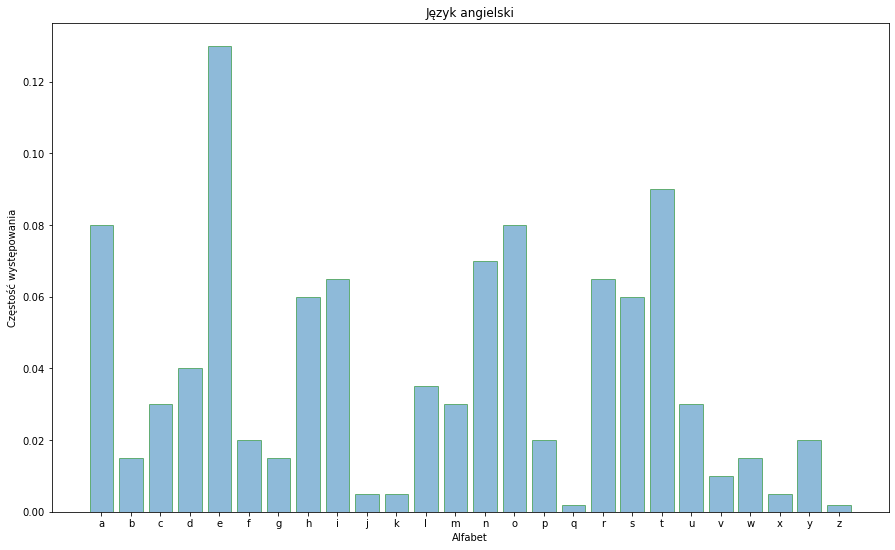

In [348]:
from matplotlib import pyplot as plt
import numpy as np

letters =   ['a',  'b',    'c',   'd',  'e',   'f',   'g',   'h',   'i',   'j',   'k',   'l',    'm',  'n',   'o',   'p',    'q',  'r',   's',   't',   'u',   'v',   'w',   'x',    'y',   'z']
frequency = [0.080, 0.015, 0.030, 0.040, 0.130, 0.020, 0.015, 0.060, 0.065, 0.005, 0.005, 0.035, 0.030, 0.070, 0.080, 0.020, 0.002, 0.065, 0.060, 0.090, 0.030, 0.010, 0.015, 0.005, 0.020, 0.002]
labels = np.arange(len(letters))
plt.figure(figsize=(15,9))
plt.bar(labels, frequency, alpha=0.5, edgecolor="green")
plt.xlabel('Alfabet')
plt.xticks(np.arange(26), ('a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'))
plt.title("Język angielski");
plt.ylabel('Częstość występowania')
plt.show()

2. Dokonaj analizy częstości występowania liter w tekście jawnym i szyfrogramie (szyfr Cezara z dowolnym przesunięciem) dla tekstu w poniższym fragmencie kodu. Wyświetl wyniki podobnie jak powyżej. 

In [349]:
import numpy as np
from matplotlib import pyplot as plt

plain_text = "TobeornottobethatisthequestionWhethertisNoblerinthemindtosufferTheSlingsandArrowsofoutrageousFortuneOrtotakeArmsagainstaSeaoftroublesAndbyopposingendthem"

alphabet = [
    'a','b','c','d','e','f','g','h','i','j','k','l','m',
    'n','o','p','q','r','s','t','u','v','w','x','y','z'
]

# policz częstość i wyświetl rozkłady
from collections import defaultdict

def count_frequency(text):
    counts = defaultdict(int)
    for char in text:
        counts[char] += 1
    return dict(counts)

def caesar_init(alphabet):
    positions = { k: i for i, k in enumerate(alphabet) }
    
    def encrypt(text, key):
        return ''.join([alphabet[(positions[char] + key) % len(alphabet)] 
                        if char in positions else char
                        for char in text.lower()])
            
    def decrypt(encrypted_text, key):
                return ''.join([alphabet[(positions[char] - key) % len(alphabet)] 
                        if char in positions else char
                        for char in text])
        
    return encrypt, decrypt

def draw_frequency_chart(text, alphabet):
    counts = count_frequency(text)
    frequencies = [counts[letter] if letter in counts else 0 for letter in alphabet]
    labels = np.arange(len(alphabet))
    plt.figure(figsize=(15,9))
    plt.bar(labels, frequencies, alpha=0.5, edgecolor="green")
    plt.xlabel('Alfabet')
    plt.xticks(np.arange(len(alphabet)), alphabet)
    plt.title("Język angielski");
    plt.ylabel('Częstość występowania')
    plt.show()

Plain text:     TobeornottobethatisthequestionWhethertisNoblerinthemindtosufferTheSlingsandArrowsofoutrageousFortuneOrtotakeArmsagainstaSeaoftroublesAndbyopposingendthem


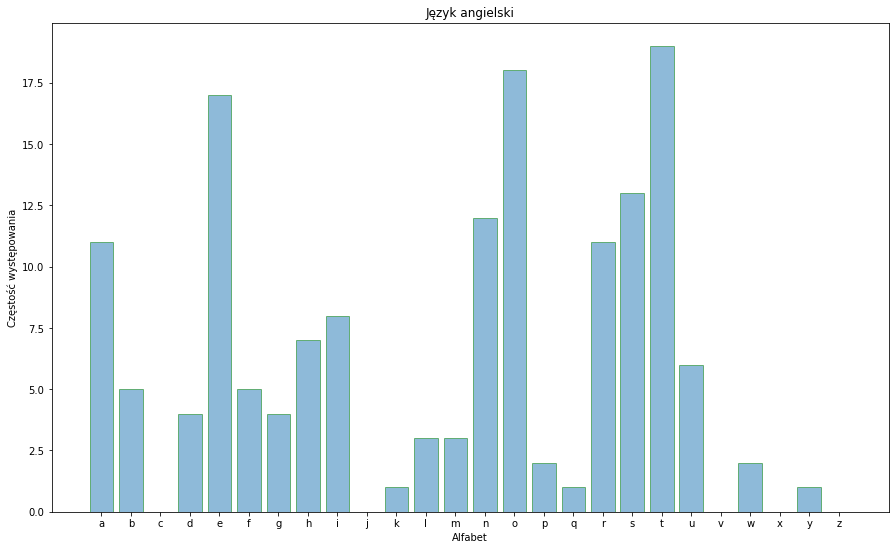

In [350]:
plain_text_lower = plain_text.lower()
print('Plain text:    ', plain_text)
draw_frequency_chart(plain_text_lower, alphabet)

Encrypted text: wrehruqrwwrehwkdwlvwkhtxhvwlrqzkhwkhuwlvqreohulqwkhplqgwrvxiihuwkhvolqjvdqgduurzvrirxwudjhrxviruwxqhruwrwdnhdupvdjdlqvwdvhdriwurxeohvdqgebrssrvlqjhqgwkhp


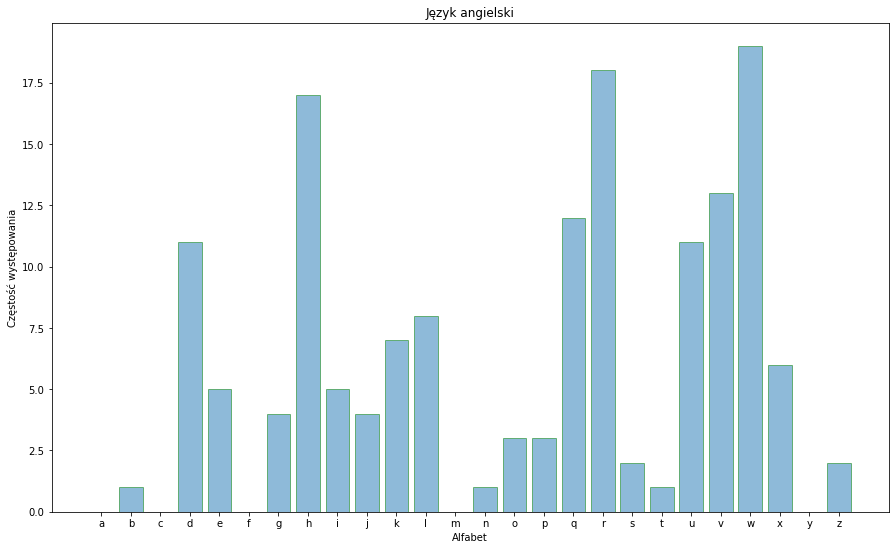

In [351]:
encrypt, decrypt = caesar_init(alphabet)
key = 3
encrypted_text = encrypt(plain_text_lower, key)
print('Encrypted text:', encrypted_text)
draw_frequency_chart(encrypted_text, alphabet)

3. Dokonaj analizy częstości występowania liter w szyfrogramie wygenerowanym przez "ulepszonego Cezara"

Encrypted text: mqefqhtqmmqefmxsmnumxfrbfumnqtdxfmxfhmnutqevfhntmxfpntlmqubjjfhmxfuvntiustlshhqduqjqbmhsifqbujqhmbtfqhmqmszfshpusisntumsufsqjmhqbevfustleaqccquntiftlmxfp


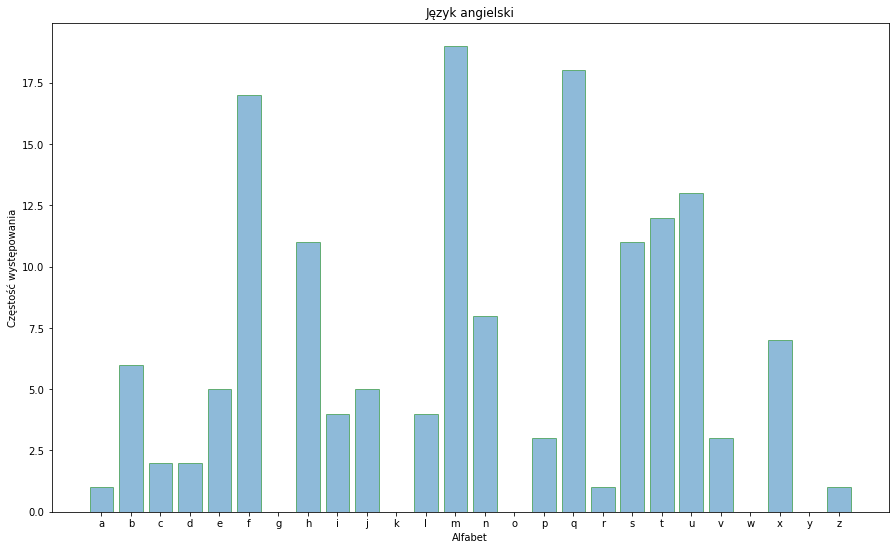

In [352]:
encrypt, decrypt = permutation_caesar_init(alphabet)
key = 3
encrypted_text = encrypt(plain_text_lower, key)
print('Encrypted text:', encrypted_text)
draw_frequency_chart(encrypted_text, alphabet)

### Ciekawostka: 
Automatyczna kryptoanaliza tekstu zaszyfrowanego zwykłym Cezarem

In [353]:
!pip install nltk 
import nltk
nltk.download('words')
from nltk.corpus import words


unique = []
frequency = []
psi = []
key = 0
value = 0.0
exit = True

ciphertext = "odggd".lower()

alphabets = "abcdefghijklmnopqrstuvwxyz"

english_frequency_prob = [0.080, 0.015, 0.030, 0.040, 0.130, 0.020, 0.015, 0.060, 0.065, 0.005, 
                          0.005, 0.035, 0.030, 0.070, 0.080, 0.020, 0.002, 0.065, 0.060, 0.090, 
                          0.030, 0.010, 0.015, 0.005, 0.020, 0.002]



for char in ciphertext: #lista liter w szyfrogramie
    if (char not in unique) and (char.isalpha()):
        unique.append(char)
        
only_alphabets = [char for char in ciphertext if char.isalpha()]  #tylko litery

for unique_char in unique: #częstość liter w tekście 
     frequency.append(ciphertext.count(unique_char) / float(len(only_alphabets)))

for i in range(0,26): #oblicz dopasowanie
    for unique_char in unique:
         value = value + frequency[unique.index(unique_char)] * english_frequency_prob[alphabets.index(unique_char) - i]
    psi.append(value)  
    value = 0.0
    
sorted_psi = psi[:] # sortuj dopasowanie
sorted_psi.sort(reverse=True)

decoded_string = ""
for i in range(0, 26):
    key = psi.index(sorted_psi[i])
    decoded_string = ""
    for char in ciphertext:
        if (char != ' '):
            decoded_string = decoded_string + alphabets[alphabets.index(char) - key]
        else:
            decoded_string = decoded_string + " "
            
    print("Próba klucza: ", key, " ....", decoded_string)
    
    for word in decoded_string.split():
        if word not in words.words(): #czy szyfrowanie ma sens
            exit = False
        else:
            exit = True
    if exit:
        break
        
print("\n", "Decoded string: ", decoded_string)

Próba klucza:  25  .... pehhe
Próba klucza:  10  .... etwwt
Próba klucza:  2  .... mbeeb
Próba klucza:  15  .... zorro

 Decoded string:  zorro


[nltk_data] Downloading package words to /Users/mateu/nltk_data...
[nltk_data]   Package words is already up-to-date!


## Podsumowanie 
Główną słabością szyfrów monoalfabetycznych jest stałość przekształcenia, dzięki czemu możliwe jest łatwe zaobserwowanie regularności.

Rozwiązaniem może być zmiana alfabetów w trakcie szyfrowania. Dla uproszczenia wystarczy zmieniać jedynie porządek liter. 

### Zadanie samodzielne dla studentów

In [354]:
plain_text = "TobeornottobethatisthequestionWhethertisNoblerinthemindtosufferTheSlingsandArrowsofoutrageousFortuneOrtotakeArmsagainstaSeaoftroublesAndbyopposingendthem"
key = "klucz"

1. Napisać program, który zmienia alfabet szyfrowania po każdej literze.
_Co będzie potrzebne oprócz tekstu jawnego?_

- Przykładem takiego algorytmu jest algorytm Vigenere'a (implementacja znajduje się wcześniej w tym pliku). Poza tekstem jawnym, potrzebny jest klucz szyfrowania oraz znajomość relacji liter z szyfrowanego tekstu i klucza. W przypadku szyfru Vigenere'a, wykorzystuje się do tego celu tabelę (również opisana wcześniej).

2. Dokonaj analizy częstościowej szyfrogramu zaszyfrowanego szyfrem Vigenera

Encrypted text: dzvgnbyivsymyvgkecusrpkwdcecqmgsyvgocnkrxzvndbthvgoxcpcdzmwepplvgodfkmqdupckclqvczzqtdcuidyfmhnbeopdycnqskvycqwduizsymvzcpuqedciwavpmcmnmsqozzmkmqphfsrpg


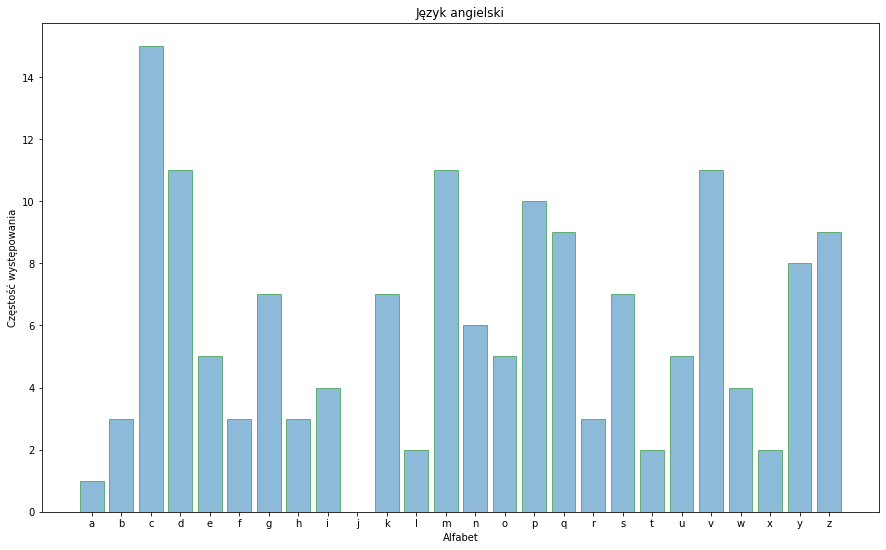

In [355]:
encrypt, decrypt = vinegere_init(alphabet)
encrypted_text = encrypt(plain_text_lower, key)
print('Encrypted text:', encrypted_text)
draw_frequency_chart(encrypted_text, alphabet)

### Zastanów się:
1. Sprawdź jak wygląda histogram szyfrogramu.

- Inaczej niż histogram szyfrowanej wiadomości. Jego wygląd jest zależny od użytego algorytmu szyfrowania.

2. Zastanów się jakie znaczenia ma długość klucza dla bezpieczeństwa szyfrowania.

- Im dłuższy klucz, tym zaszyfrowana wiadomość jest trudniejsza do odszyfrowania.

3. Czy powtarzanie klucza można wykorzystać dla potrzeb kryptoanalizy?

- Wielokrotne wykorzystywanie tego samego klucza może dawać w rezultacie szyfrogramy o podobnych cechach. Z rego powodu, można wykorzystać powtarzanie klucza dla potrzeb kryptoanalizy, w celu sprawdzenia jakości algorytmu szyfrowania.

4. Jaki klucz gwarantowałby bezpieczeństwo?

- Taki klucz, który nie został wcześniej wykorzystany i jego długość jest przynajmniej taka jak długość szyfrowanej wiadomości.

5. Jaki rozkład częstości symboli szyfrogramu nie ujawni żadnych przydatnych danych kryptoanalitykowi? 

- Rozkład, w którym częstość występowania poszczególnych symboli jest niezależna od częstości wykorzystywania tych symboli w słowach danego języka. Wówczas, nie można dopasować liter szyfrogramu do odpowiednich liter alfabetu szyfrowego, na podstawie częstości ich występowania.

### Szyfr polialfabetyczny 
- _Szyfr używający wielu alfabetów szyfrowych. W trakcie szyfrowania te same litery w tekście jawnym_

### Szyfr doskonały (według Clouda Shannona):
1. Jakie warunki musi spełniać szyfr-nie-do-złamania? 
- klucz użyty do szyfrowania wiadomości jest dłuższy lub tej samej długości, co szyfrowana wiadomość,
- klucz jest wygenerowany w sposób całkowicie losowy (nie istnieje sposób na odtworzenie klucza na podstawie znajmości działania generatorów liczb pseudolosowych),
- klucz nie może być użyty do zaszyfrowania więcej niż jednej wiadomości

## Zadanie (dodatkowe, na ocenę)
1. Napisz notebook jupyter, które implementuje klasyczne szyfry mechaniczne: Enigma, szyfr Playfair, szyfr maszyny Lorenza. W sieci można łatwo znaleźć gotowe kody, wiec przy ocenie zwracam uwagę no dokładne omówienie kodu, przejrzystość, komentarze etc. 

### Szyfr Enigma

#### Opis
- Enigma jest urządzeniem przypominającym maszynę do pisania, składającym się z następujących elementów, biorących udział w szyfrowaniu wiadomości:
  - klawiatura,
  - panel (plugboard), pozwalający na ręczne przepięcie par liter (np. zamianę litery **A** z literą **G**),
  - rotory (wirniki) (pierwotnie 3, później nawet 7), zmieniające swoje ułożenie po każdym naciśnięciu przycisku na klawiaturze,
  - reflektor (dzięki niemu sygnał wraca z powrotem przez obwód do klawiatury i skutkuje zapaleniem się odpowiedniej lampki, oznaczającej zakodowany znak)
- Po naciśnięciu dowolnego klawisza na klawiaturze, obraca się pierwszy w kolejności rotor. Każdy rotor posiada wgłębienie. Po obróceniu się pierwszego rotora do pozycji, w której znajduje się wgłębienie sąsiadującego rotora, następuje obrót obu rotorów równocześnie. Zakładając, że alfabet szyfrowy ma $26$ znaków, możemy zauważyć, iż pierwszy rotor obraca się za każdym razem, gdy naciśniemy klawisz na klawiaturze. Kolejny rotor obraca się co $26$ wprowadzonych znaków, następny co $26 \cdot 26 = 676$, itd.
- każdy z rotorów posiada zdefiniowane mapowanie liter alfabetu na pewną permutację tych liter. Przykładowo, pierwszy rotor może przekształcać kolejne litery alfabetu w następujący sposób: `ABCDEFGHIJKLMNOPQRSTUVWXYZ -> EKMFLGDQVZNTOWYHXUSPAIBRCJ`,
- każdy rotor posiada również ustaloną pozycję wgłębienia, powodującego jego obrót,

##### Szyfrowanie wiadomości
- na początku należy wybrać konfigurację maszyny (ustawić połączenia na panelu i dobrać rotory, które mają odpowiednie mapowania liter oraz pozycje wgłębień),
- szyfrowanie odbywa się poprzez wpisywanie kolejnych liter na klawiaturze,
- jako klucz szyfrowania służy początkowa konfiguracja maszyny (ułożenie i rodzaj rotorów oraz połączenia w panelu)

##### Odszyfrowywanie wiadomości
- aby odszyfrować wiadomość, należy dysponować takim samym zestawem rotorów (ułożone w takiej samej kolejności, z takim samym mapowaniem liter alfabetu i tymi samymi pozycjami wgłębień),
- konieczne jest również podłączenie liter na panelu w taki sam sposób jak w maszynie, na której została zaszyfrowana wiadomość,
- rotory należy obrócić w taki sposób, jak na początku w maszynie, na której odbywało się szyfrowanie (ustawić na nich takie same początkowe symbole (litery)),
- po prawidłowej konfiguracji początkowej, wystarczy wpisać otrzymany szyfrogram, żeby otrzymać tekst jawny

In [356]:
'''
Rotor wiring (Enigma I): https://www.wikiwand.com/en/Enigma_rotor_details
'''

class Keyboard:
  def __init__(self, alphabet):
    self.letters = alphabet
    self.signals = {l: i for i, l in enumerate(alphabet)}

  def forward(self, letter):
    return self.signals[letter]

  def backward(self, signal):
    return self.letters[signal]

class Component:
  def __init__(self, left, right):
    self.left = left
    self.right = right

  def forward(self, signal):
    letter = self.right[signal]
    return self.left.index(letter)

  def backward(self, signal):
    letter = self.left[signal]
    return self.right.index(letter)

class Plugboard(Component):
  def __init__(self, alphabet, pairs):
    left = list(alphabet)
    right = list(alphabet)

    positions = {l: i for i, l in enumerate(alphabet)}

    for l1, l2 in pairs:
      idx1 = positions[l1]
      idx2 = positions[l2]
      left[idx1], left[idx2] = left[idx2], left[idx1]

    super().__init__(left, right)
    
class Rotor(Component):
  def __init__(self, alphabet, wiring, notch):
    super().__init__(alphabet, wiring)
    self.alphabet = alphabet
    self.notch = notch

  def rotate(self, steps=1, forward=True):
    if forward:
      self.left = self.left[steps:] + self.left[:steps]
      self.right = self.right[steps:] + self.right[:steps]
    else:
      self.left = self.left[-steps:] + self.left[:-steps]
      self.right = self.right[-steps:] + self.right[:-steps]

  def rotate_to_letter(self, letter):
    self.rotate(self.left.index(letter))

  def set_ring(self, position):
    # rotate the rotor backwards
    self.rotate(position, forward=False)
    # adjust the notch position
    notch_position = self.alphabet.index(self.notch)
    self.notch = alphabet[notch_position - position]

class Reflector(Component):
  def __init__(self, alphabet, wiring):
    super().__init__(alphabet, wiring)

  def reflect(self, signal):
    return super().forward(signal)

  # Remove forward and backward methods from the Reflector class
  def forward(self, *args, **kwargs):
    raise AttributeError(f"'{self.__class__.__name__}' object has no attribute 'forward'")

  def backward(self, *args, **kwargs):
    raise AttributeError(f"'{self.__class__.__name__}' object has no attribute 'backward'")

class Enigma:
  def __init__(self, keyboard, plugboard, rotors, reflector):
    self.keyboard = keyboard
    self.plugboard = plugboard
    self.rotors = rotors
    self.reflector = reflector

  def set_key(self, key):
    if len(key) != len(self.rotors):
      raise AttributeError(f"'key' must have {len(self.rotors)} letters")
    for i, letter in enumerate(key):
      self.rotors[i].rotate_to_letter(letter.upper())

  def set_rings(self, rings):
    if len(rings) != len(self.rotors):
      raise AttributeError(f"'rings' must contain {len(self.rotors)} numbers")
    for i, ring in enumerate(rings):
      self.rotors[i].set_ring(ring)

  def encrypt(self, message):
    return ''.join([self.__encrypt_letter(letter) for letter in message.upper()])
    
  def decrypt(self, cipher):
    # Decryption is the same as encryption
    return ''.join([self.__encrypt_letter(letter) for letter in cipher.upper()])

  def __encrypt_letter(self, letter):
    self.__rotate_rotors()
    signal = self.keyboard.forward(letter)
    signal = self.plugboard.forward(signal)
    for rotor in self.rotors[::-1]:
      signal = rotor.forward(signal)
    signal = self.reflector.reflect(signal)
    for rotor in self.rotors:
      signal = rotor.backward(signal)
    signal = self.plugboard.backward(signal)
    return self.keyboard.backward(signal)

  def __rotate_rotors(self):
    for rotor in self.rotors[::-1]:
      rotate_next = rotor.left[0] == rotor.notch
      rotor.rotate()
      if not rotate_next:
        return

In [357]:
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

# Keyboard and plugboard
keyboard = Keyboard(alphabet)
plugboard = Plugboard(alphabet, ["KR", "YP", "TO"])

# Rotors and reflector
rotorI = Rotor(alphabet, "EKMFLGDQVZNTOWYHXUSPAIBRCJ", "Q")
rotorII = Rotor(alphabet, "AJDKSIRUXBLHWTMCQGZNPYFVOE", "E")
rotorIII = Rotor(alphabet, "BDFHJLCPRTXVZNYEIWGAKMUSQO", "V")
reflectorA = Reflector(alphabet, "EJMZALYXVBWFCRQUONTSPIKHGD")

# Enigma machine
enigma = Enigma(
  keyboard,
  plugboard,
  [rotorI, rotorII, rotorIII],
  reflectorA
)


In [358]:
enigma.set_rings((4, 7, 22))

enigma.set_key("AGH")
encrypted = enigma.encrypt("mojatajnawiadomosc")
# Reset rotors positions before decrypting a message
enigma.set_key("AGH")
decrypted = enigma.decrypt(encrypted)

print("Encrypted:", encrypted)
print("Decrypted:", decrypted)

Encrypted: TAZSJOOZOJPVJSNLPU
Decrypted: MOJATAJNAWIADOMOSC


### Szyfr Playfair

##### Opis
- Szyfr Playfair polega na utworzeniu tablicy znaków o wymiarach $5 \times 5$, a następnie, przekształcaniu kolejnych par liter tekstu jawnego w określony sposób, korzystając z tej tablicy.

##### Tworzenie tablicy
- Do stworzenia tablicy jest wykorzystywany podany klucz szyfrowania oraz litery alfabetu szyfrowego,
- Tablica jest wykorzystywana zarówno przy szyfrowaniu jak i przy odszyfrowywaniu,
- W pierwszym kroku, tworzona jest tablica $5 \times 5$, w następujący sposób:
  - jako kolejne litery w wierszu wpisywane są kolejne litery klucza z pominięciem tych, które wystąpiły wcześniej,
  - litery $i$ oraz $j$ są traktowane tożsamo (jako takie same litery, ponieważ jest 26 liter alfabetu łacińskiego, a tablica ma tylko 25 pól, więc trzeba pozbyć się jednej z liter. Zazwyczaj pozbywamy się litery $i$ lub $j$),
  - jeżeli do tablicy wpisaliśmy literę $i$, nie wpisujemy już litery $j$ (lub, jeżeli wpisaliśmy literę $j$, nie wpisujemy litery $i$),
  - następnie, tablicę dopełniamy pozostałymi literami alfabetu w takiej kolejności, w jakiej te litery występują w alfabecie (trzymamy się również wyżej opisanych zasad, więc pomijamy wpisane wcześniej litery i traktujemy litery $i$ oraz $j$ jako tę samą literę),

###### Tworzenie tablicy (przykład)
**Klucz:** mojkluczszyfrowania
Wypełnienie tablicy kluczem:
```
+---+---+---+---+---+
| m | o | j | k | l |
+---+---+---+---+---+
| u | c | z | s | y |
+---+---+---+---+---+
| f | r | w | a | n |
+---+---+---+---+---+
|   |   |   |   |   |
+---+---+---+---+---+
|   |   |   |   |   |
+---+---+---+---+---+
```
Dopełnienie pozostałymi literami alfabetu:
```
+---+---+---+---+---+
| m | o | j | k | l |
+---+---+---+---+---+
| u | c | z | s | y |
+---+---+---+---+---+
| f | r | w | a | n |
+---+---+---+---+---+
| b | d | e | h | h |
+---+---+---+---+---+
| p | q | t | v | x |
+---+---+---+---+---+
```

##### Szyfrowanie
- W kolejnym kroku, dzielimy tekst jawny na bloki, składające się z 2 liter, zgodnie z poniższymi zasadami:
  - 2 sąsiednie litery tworzą pojedynczy blok,
  - jeżeli obie litery są takie same, zamieniamy 2. literę na inną (zwykle przyjmuje się, że jest to litera $x$),
  - jeżeli ostatni blok składa się z 1 litery (bo tekst jawny ma nieparzystą liczbę znaków), dopisujemy do tego bloku literę $x$, tworząc parę liter,
- Szyfrujemy kolejne pary, zgodnie z poniższymi zasadami:
  - jeżeli obie litery z pary znajdują się w tym samym wierszu, zastępujemy je przed ich sąsiadów, leżących po ich prawej stronie. Jeżeli jedna z liter znajduje się w ostatniej kolumnie, zastępujemy ją przez literę z tego samego wiersza, leżącą w pierwszej kolumnie,
  - jeżeli obie litery znajdują się w tej samej kolumnie, zastępujemy je przez ich sąsiadów, leżących jeden wiersz niżej względem odpowiednich liter. Jeżeli jedna z liter znajduje się w ostatnim wierszu, zastępujemy ją przez literę z pierwszego wiersza (leżącą w tej samej kolumnie),
  - jeżeli litery nie leżą ani w tym samym wierszu, ani w tej samej kolumnie, każdą z liter z pary zastępujemy literą, znajdującą się w tym samym wierszu, leżącą w tej kolumnie, w której znajduje się druga litera z pary,
- Tak otrzymane pary łączymy w jeden ciąg tekstowy i otrzymujemy szyfrogram.

##### Odszyfrowywanie
- Zaczynamy tak samo, jak przy szyfrowaniu, dzieląc szyfrogram na 2-literowe bloki,
- Wykonujemy operacje odwrotne, niż przy szyfrowaniu:
  - jeżeli litery znajdują się w tym samym wierszu, zastępujemy je odpowiednio przez ich sąsiadów z lewej strony (pamiętając, że gdy jedna z liter jest w pierwszej kolumnie, bierzemy literę z ostatniej kolumny),
  - jeżeli litery są w tej samej kolumnie, zastępujemy je literami, które znajdują się 1 wiersz nad nimi (jak jedna z liter jest w pierwszym wierszu, bierzemy literę z ostatniego wiersza),
  - jeżeli litery z pary nie są ani w jednym wierszu ani w jednej kolumnie, postępujemy identycznie jak przy szyfrowaniu,
- Otrzymane pary łączymy w ciąg tekstowy, otrzymując tekst jawny.

https://www.wikiwand.com/en/Playfair_cipher

In [359]:
class Playfair:
  alphabet = "abcdefghijklmnopqrstuvwxyz"

  def __init__(self, key):
    self.table = [[''] * 5 for _ in range(5)]
    self.key = key.lower()
    self.__fill_table()
    self.coordinates = self.__get_coordinates()

  def encrypt(self, message):
    # Divide the message into pairs of 2 different letters
    pairs = self.__split_into_pairs(message)
    return ''.join(self.__encrypt_pair(pair) for pair in pairs)

  def decrypt(self, cipher):
    pairs = self.__split_into_pairs(cipher)
    return ''.join(self.__decrypt_pair(pair) for pair in pairs)

  def __split_into_pairs(self, message):
    pairs = []
    for i in range(0, len(message), 2):
      left = message[i]
      right = message[i + 1] if i < len(message) - 1 and message[i + 1] != message[i] else 'x'
      pairs.append(left + right)
    return pairs

  def __fill_table(self):
    used_letters = set()

    def is_used(letter):
      return letter in used_letters \
          or letter == 'i' and 'j' in used_letters \
          or letter == 'j' and 'i' in used_letters

    def put_letter(letter, idx):
      self.table[idx // 5][idx % 5] = letter
      used_letters.add(letter)
    
    i = 0
    for letter in self.key:
      if is_used(letter): continue
      put_letter(letter, i)
      i += 1
    
    for letter in self.alphabet:
      if is_used(letter): continue
      put_letter(letter, i)
      i += 1

  def __get_coordinates(self):
    coordinates = {}

    for i in range(5):
      for j in range(5):
        coordinates[self.table[i][j]] = (i, j)

    coordinates['j'] = coordinates['i']
    coordinates['i'] = coordinates['j']

    return coordinates

  def __encrypt_pair(self, pair):
    r1, c1 = self.coordinates[pair[0]]
    r2, c2 = self.coordinates[pair[1]]

    # If the letters appear on the same row of your table, replace them with the letters to their immediate right respectively (wrapping around to the left side of the row if a letter in the original pair was on the right side of the row)
    if r1 == r2:
      return self.table[r1][(c1 + 1) % 5] + self.table[r1][(c2 + 1) % 5]
    # If the letters appear on the same column of your table, replace them with the letters immediately below respectively (wrapping around to the top side of the column if a letter in the original pair was on the bottom side of the column)
    if c1 == c2:
      return self.table[(r1 + 1) % 5][c1] + self.table[(r2 + 1) % 5][c1]
    # If the letters are not on the same row or column, replace them with the letters on the same row respectively but at the other pair of corners of the rectangle defined by the original pair.
    return self.table[r1][c2] + self.table[r2][c1]

  def __decrypt_pair(self, pair):
    r1, c1 = self.coordinates[pair[0]]
    r2, c2 = self.coordinates[pair[1]]

    if r1 == r2:
      return self.table[r1][(c1 - 1) % 5] + self.table[r1][(c2 - 1) % 5]
    if c1 == c2:
      return self.table[(r1 - 1) % 5][c1] + self.table[(r2 - 1) % 5][c1]
    return self.table[r1][c2] + self.table[r2][c1]

In [360]:
key = "playfairexample"
plain_text = "mojatajnawiadomosc"

playfair = Playfair(key)

encrypted = playfair.encrypt(plain_text)
decrypted = playfair.decrypt(encrypted)

print("Encrypted:", encrypted)
print("Decrypted:", decrypted)

Encrypted: esepvprkyvepovesnh
Decrypted: moiatainawiadomosc


### Szyfr Lorenza

##### Opis
- Szyfr Lorenza jest trudniejszy do złamania niż szyfr Enigma,
- Maszyna Lorenza jest zbudowana, podobnie do Enigmy, z wirników, które działają w inny niż w Enigmie sposób,

##### Szyfrowanie
- Każda z liter, znajdujących się na klawiaturze, była przekształcana na odpowiadający jej ciąg bitowy (najczęściej kod Baudot, składający się z 5 bitów),
- Wprowadzenie litery powodowało wygenerowaniu pseudolosowego ciągu bitów (jeżeli litery kodujemy 5-bitowym ciągiem Baudot, otrzymywaliśmy 5-bitowy ciąg pseudolosowych bitów). Ciąg ten był generowany poprzez obrót 5 wirników (rotorów),
- Następnie, wykorzystywano szyfrowanie Vernama, czyli wykonywano operację `XOR` na 5-bitowym ciągu, odpowiadającym kodowanej literze z tekstu jawnego oraz 5-bitowym ciągu pseudolosowym,
- Tak otrzymany ciąg bitów, zamieniano z powrotem na literę, której on odpowiada (zgodnie z wykorzystywanym kodowaniem, np. kodowaniem Baudot), wszystkie zaszyfrowane litery łączono i otrzymywano szyfrogram,

##### Odszyfrowywanie
- Odszyfrowywanie działało identycznie jak szyfrowanie (wykonanie operacji `XOR` na kolejnych ciągach 5-bitowych, z wykorzystaniem tych samych ciągów pseudolosowych, co podczas szyfrowania, skutkowało otrzymaniem ciągów 5-bitowych z tekstu jawnego),
- Aby móc odszyfrować wiadomość, trzeba było posiadać taką samą konfigurację początkową maszyny Lorenza, a więc mieć taki sam zestaw tak samo ustawionych wirników. Takie same ustawienia początkowe gwarantowały, że maszyna wygeneruje ten sam ciąg liczb pseudolosowych, co pozwoli na odszyfrowanie wiadomości.

##### Opis implementacji
- Umieszczona niżej implementacja jest implementacją uproszczoną, pomijającą działanie generatora liczb pseudolosowych w maszynie Lorenza. Do wygenerowania kolejnych liczb pseudolosowych, wykorzystałem bibliotekę `random`, ustawiając taki sam `seed` (ziarno) podczas szyfrowania i odszyfrowywania wiadomości,
- Ustawienie ziarna odpowiada ustawieniu takiej samej konfiguracji maszyny przed rozpoczęciem odszyfrowywania jak konfiguracja, jaką mieliśmy przed rozpoczęciem szyfrowania.

In [361]:
import random

class Lorenz:
  # Baudot-Murray codes
  codes = { 
    'a': '00011', 
    'b': '11001',
    'c': '01110',
    'd': '01001',
    'e': '00001',
    'f': '01101',
    'g': '11010',
    'h': '10100',
    'i': '00110',
    'j': '01011',
    'k': '01111',
    'l': '10010',
    'm': '11100',
    'n': '01100',
    'o': '11000',
    'p': '10110',
    'q': '10111',
    'r': '01010',
    's': '00101',
    't': '10000',
    'u': '00111',
    'v': '11110',
    'w': '10011',
    'x': '11101',
    'y': '10101',
    'z': '10001',
    ' ': '00100',
    'N': '00000',
    'C': '01000',
    'L': '00010',
    'F': '11011',
    'T': '11111'
  }

  def __init__(self):
    self.random = random.Random(0)

  def set_key(self, key):
    self.random = random.Random(key)

  def encrypt(self, message):
    return self.__run(message)

  def decrypt(self, cipher):
    return self.__run(cipher)

  def __run(self, text):
    # The Lorenz machine used a complicated system of rotors to generate
    # subsequent pseudorandom numbers. To simulate this behavior, we can
    # simply use the Python random function which will generate a pseudorandom
    # number and choose the corresponding character used as a bit stream to
    # encode a particular letter from the message to encrypt
    characters = list(self.codes.keys())
    binary = list(self.codes.values())
    key_stream = ''.join(self.random.choice(characters) for _ in range(len(message)))
    indices = [int(self.codes[letter], 2) ^ int(self.codes[key], 2) for letter, key in zip(text, key_stream)]
    return ''.join(characters[binary.index(f"{i:#07b}"[2:])] for i in indices)

In [362]:
plain_text = "my secret message"

lorenz = Lorenz()

lorenz.set_key(123)
encrypted = lorenz.encrypt(plain_text)
lorenz.set_key(123)
decrypted = lorenz.decrypt(encrypted)

print("Encrypted:", encrypted)
print("Decrypted:", decrypted)

Encrypted: yTdejh hcgycaFxnc
Decrypted: my secret message
